<a href="https://colab.research.google.com/github/kellykryoung/AI_Study/blob/main/textmining/01_LinearRegression_ML_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style='darkgrid')

## Machine Learning(머신러닝)의 종류

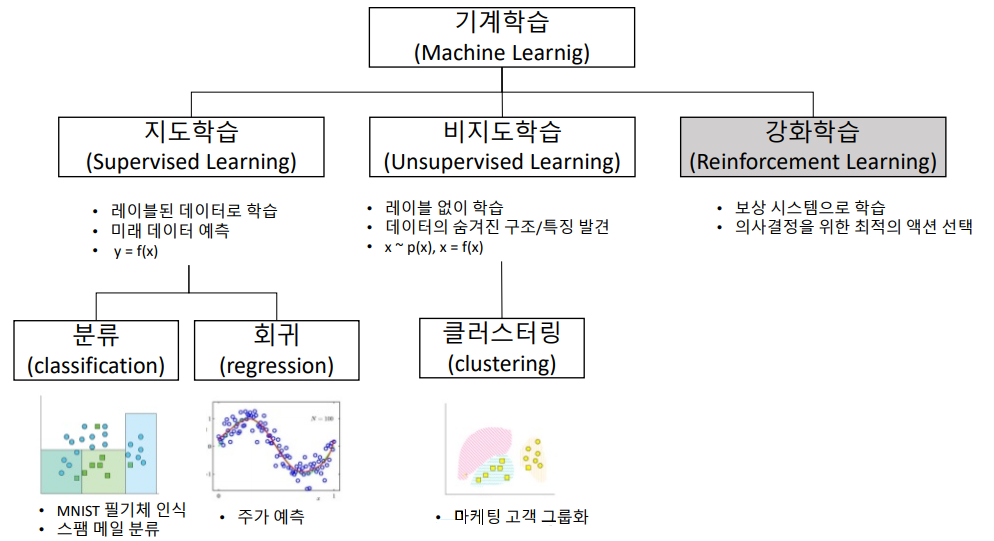

- 이미지 출처 : https://bestpractice80.tistory.com/2

# Regression(회귀분석)이란?

#### 1. 가정해보기

카페 사장님이라고 생각해보세요.   
만약 평균 기온을 활용하여 내일의 아이스 아메리카노 판매량을 예측할 수 있다면?

- 문제 정의
    - 데이터 : 과거 평균 기온(X)와 그에 따른 아이스 아메리카노 판매량(Y)
    - 가정 : 평균 기온과 판매량은 선형적인 관계를 가지고 있음
    - 목표 : 평균 기온에 따른 아이스 아메리카노 판매량 예측하기
- 해결 방안
    - 회귀 분석
        - 연속형 종속변수(y, target)와 다양한 독립변수의 관계를 모형화하여 목표변수를 분석, 예측하는 기법
        - 종속변수에 영향을 미치는 독립변수를 찾고, 종속변수의 값을 예측하는 것이 목적

    - 활용
        - 광고 지출액에 따라 매출액은 어떻게변하는가?
        - 담배 판매량이 증가하면폐암 환자수도증가하는가?

In [4]:
# 위의 가정의 data
pd.DataFrame({"평균기온":[10, 17, 23, 33], "아이스 아메리카노 판매량(천)":[20, 23, 33, 40]})

,평균기온,아이스 아메리카노 판매량(천)
0,10,20
1,17,23
2,23,33
3,33,40


## Linear Regression(선형회귀)란?

### 단순 선형 회귀

- 회귀의 목표는 연속형 반응 변수의 값을 예측하는 것
- 단순 선형 회귀라는 것은 독립변수와 종속변수 간에 선형관계가 있다고 가정하고, 초평면이라고 하는 선형 평면을 이용해 모델링 하는 것

$$
y = ax + b   (a는 기울기, b는 절편)
$$



- 알고리즘을 이용해 최적의 a와 b값을 찾아내는 것이 목표
    - 데이터를 가장 잘 설명하는 선을 찾아 입력값에 따른 미래 결과값을 예측하는 알고리즘

In [12]:
# 0.데이터
rng = np.random.RandomState(1)
X = 10 * rng.rand(50) # 50개의 0~10까지 난수,
rng.rand(50) # 0~1 사이의 수
y = 2*X -5 + rng.rand(50)

X, y

(50,
 array([3.26644902, 5.27058102, 8.85942099, 3.5726976 , 9.08535151,
        6.23360116, 0.15821243, 9.29437234, 6.90896918, 9.9732285 ,
        1.72340508, 1.3713575 , 9.32595463, 6.96818161, 0.66000173,
        7.55463053, 7.53876188, 9.23024536, 7.11524759, 1.24270962,
        0.19880134, 0.26210987, 0.28306488, 2.46211068, 8.60027949,
        5.38831064, 5.52821979, 8.42030892, 1.24173315, 2.79183679,
        5.85759271, 9.69595748, 5.61030219, 0.18647289, 8.00632673,
        2.32974274, 8.07105196, 3.87860644, 8.63541855, 7.47121643,
        5.56240234, 1.36455226, 0.5991769 , 1.21343456, 0.44551879,
        1.07494129, 2.25709339, 7.1298898 , 5.59716982, 0.1255598 ]))

In [19]:
# X 데이터 전처리 : x를 2차원으로 변형(데이터 개수, features)

X = X.reshape(-1,1)
X.shape

(50, 1)

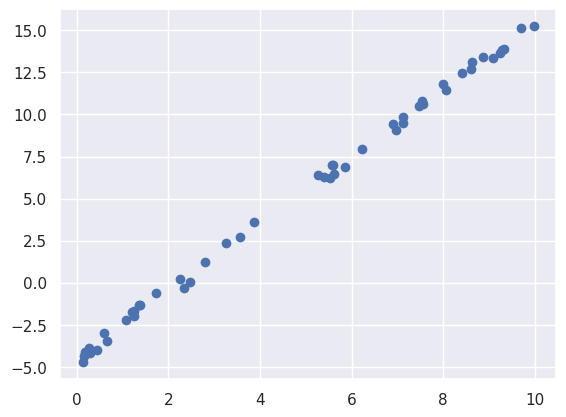

In [17]:
# 분포도 확인
plt.scatter(X, y)

In [22]:
# 1.모델: LinearRegresion(회귀모델)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
# 2. 학습( fit ) :  초기 weight 선택 -> 시행 착오 수정 -> 가장 cost가 낮은 지점에 weight를 찾는 것
model.fit(X,y)

LinearRegression()

In [21]:
# Weight , bias
model.coef_, model.intercept_

(array([1.99294071]), -4.4522343947909055)

In [24]:
# 3. 예측 (predict)
y_pred = model.predict(X)
y_pred

array([ 2.05760484,  6.0517211 , 13.20406639,  2.6679401 , 13.65433251,
        7.97096313, -4.1369264 , 14.07089863,  9.31693155, 15.42381872,
       -1.01759024, -1.71920021, 14.13384026,  9.43493843, -3.13689008,
       10.60369634, 10.57207108, 13.94309735,  9.72803219, -1.9755878 ,
       -4.05603511, -3.92986497, -3.88810287,  0.45460621, 12.68761273,
        6.28634925,  6.56517988, 12.32894207, -1.97753384,  1.1117308 ,
        7.2216006 , 14.87123401,  6.72876525, -4.08060497, 11.50390009,
        0.19080476, 11.63289364,  3.27759829, 12.75764279, 10.43745699,
        6.63330368, -1.73276265, -3.25811037, -2.03393126, -3.56434187,
       -2.30994013,  0.0460189 ,  9.75721327,  6.70259321, -4.20200115])

In [28]:
# 4. 평가 (scroe)
model.score(X,y)

0.9982337843711206

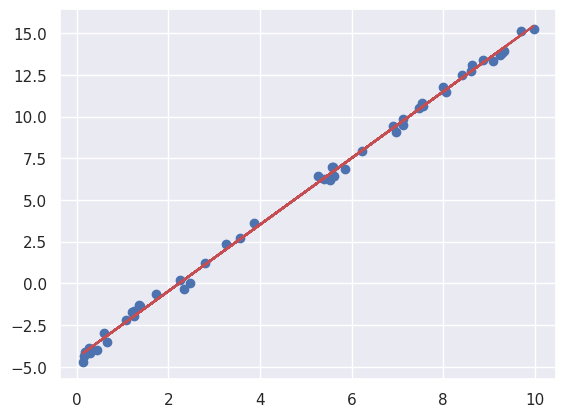

In [25]:
# 실제값과 예측값 그래프로
plt.scatter(X, y) # 실제값
plt.plot(X, y_pred, color ='r') # 예측값

In [29]:
print("모델의 기울기:", end = ' ')
print(model.coef_[0])

print("모델의 절편:", end = ' ')
model.intercept_

모델의 기울기: 1.992940711810955
모델의 절편: 

-4.4522343947909055

### 어떻게 최적의 선을 찾을까 ?

선형회귀의 알고리즘은 "최소 제곱법"을 사용
- 예측 오차(실제 값과 예측값의 차이)를 최소화해라!

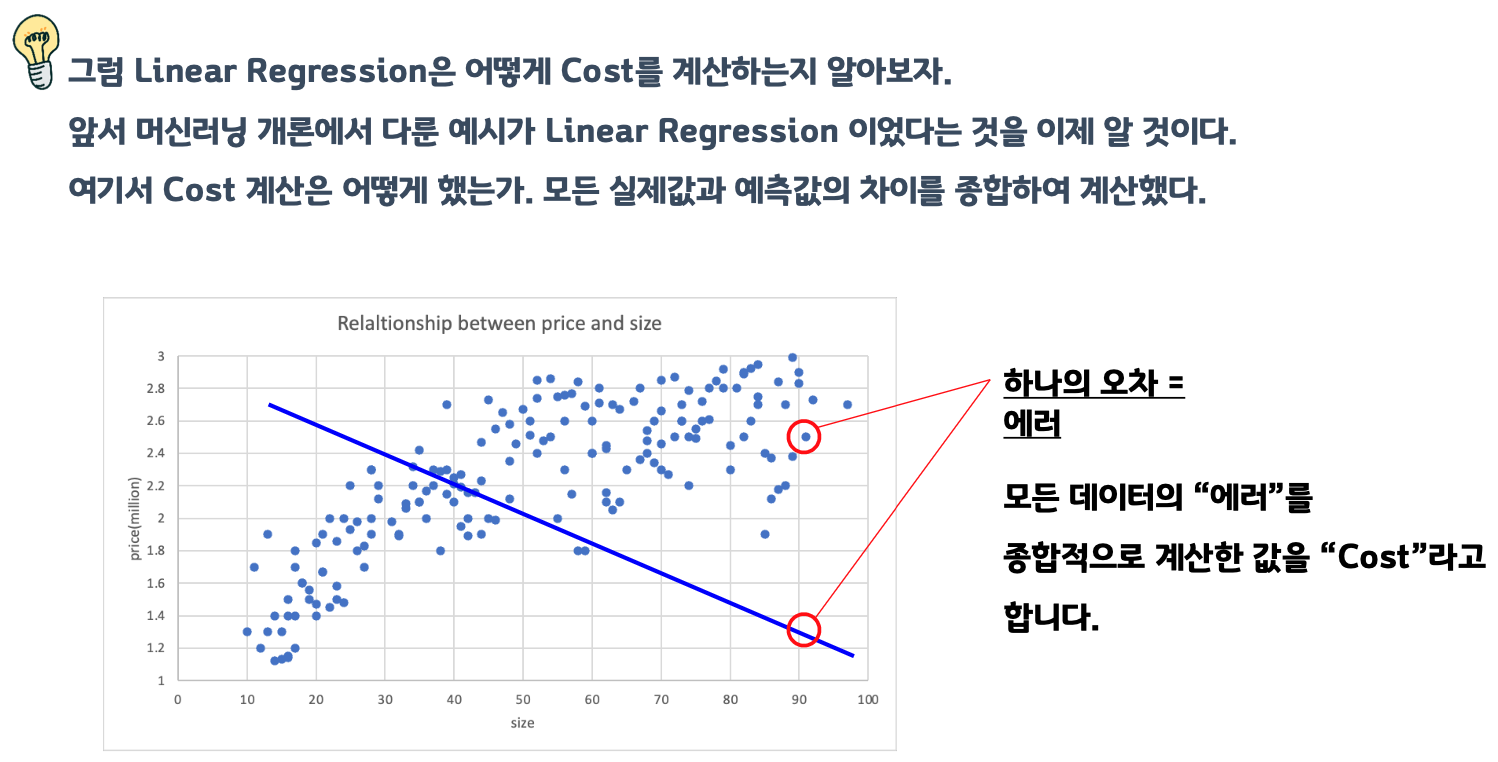

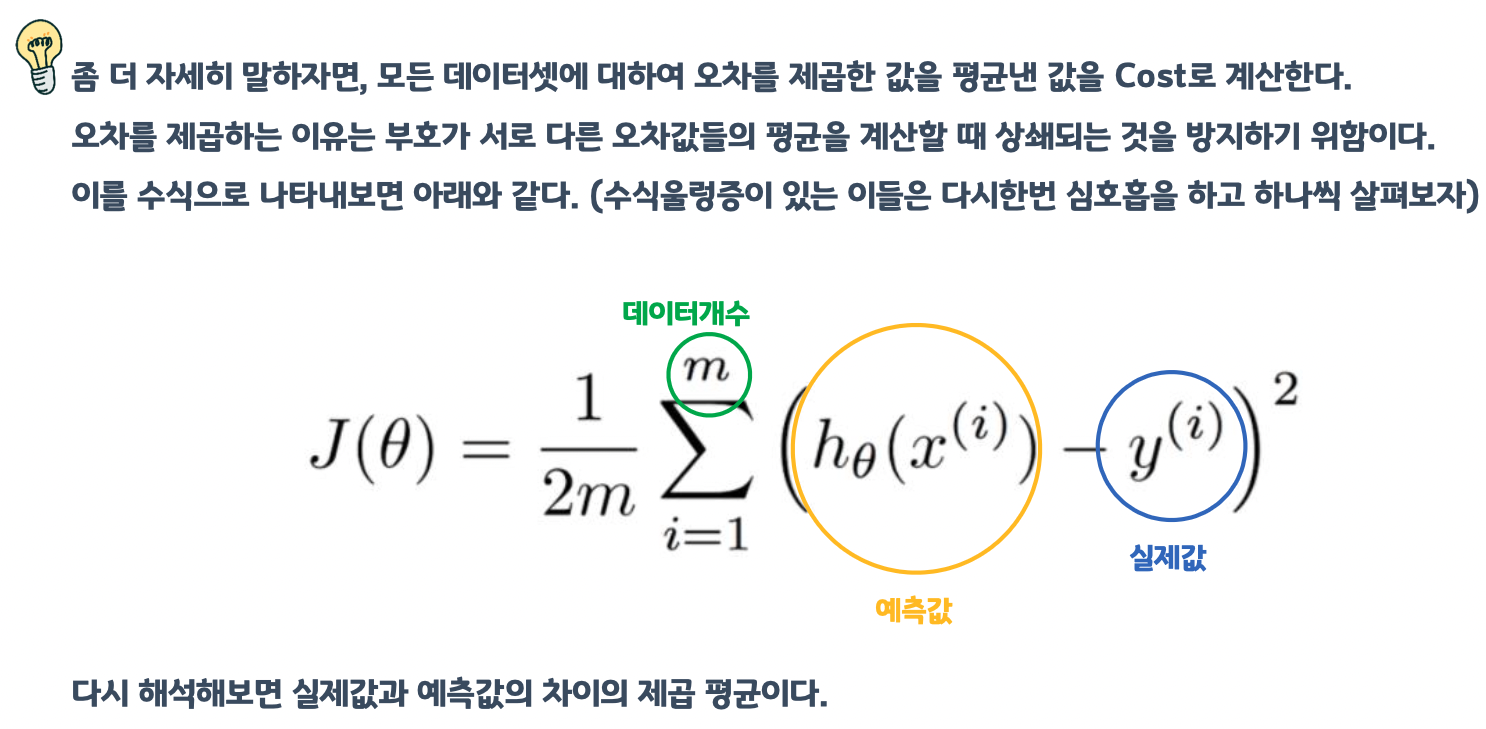

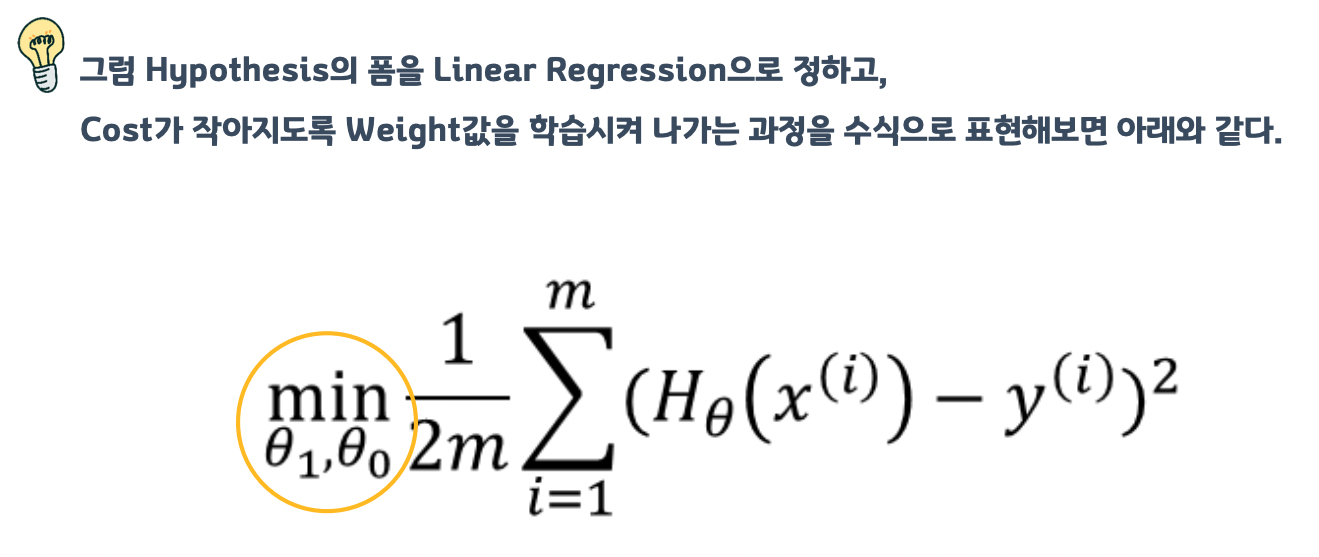

### 어떤 모델이 좋은 모델일까? (단순 선형 회귀모델의 평가)



#### 결정계수
- 회귀 모델의 기본 예측 능력 평가 지표 : 결정계수 $ R^2 $
- $ 0 <= R^2 <= 1 $
- 현재 regression이 데이터의 분산을 얼마나 설명하는가
- 1에 가까울 수록 좋음
- 다만 설명계수는 변수(특징)이 많아지만 값이 커지는 문제가 있음

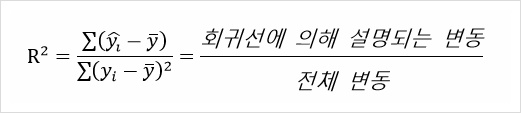

- 이미지 출처 : https://mansoostat.tistory.com/76

In [30]:
# 모델이 가지고 있는 메서드
model.score(X,y)

0.9982337843711206

In [37]:
# 다른 평가지표가 필요함
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.9982337843711206

#### 평균 제곱근 오차 (RMSE : Root Mean Square Error)
- 분산의 제곱근, 즉 표준오차를 말함

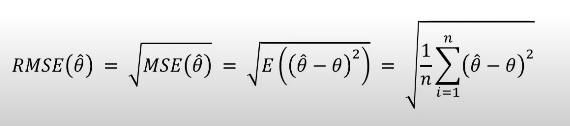

In [39]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y, squared=True)
rmse = np.sqrt(mse)
rmse

0.27790685466821935

In [40]:
mse2 = mean_squared_error(y_pred,y, squared = False)
mse2

0.27790685466821935

### 다중 선형 회귀

#### 문제
- 만약 입력값에 강수량이 추가된다면?
- 즉 평균기온과 평균 강수량에 따른 아이스 아메리카노 판매량을 예측하고자 할때

문제해결
- 여러 개의 입력값(Xn)으로 결과값(Y)을 예측하고자 하는 경우
- 다중 선형 회귀(Multiple Linear Regression)

다중 선형 회귀 특징

- 회귀의 목표는 연속형 반응 변수의 값을 예측하는 것
- 다중 선형 회귀라는 것은 독립변수 n개의 특징과 종속변수 1개간에 선형관계가 있다고 가정하고, 초평면이라고 하는 선형 평면을 이용해 모델링 하는 것
- 독립변수 n차원, 반응 변수 1차원 -> 모델 n+1차원
- 초평면 n 차원

$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$

In [11]:
# 0. Data
X = np.random.rand(100, 2)*10  # x1, x2, x3
y = np.dot(X, [1.5, -2.]) + 0.5 + np.random.rand(100)*5  # y = 1.5x1 + -2x2 + 1x3 + 0.5

# 1. model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 2. Training
model.fit(X,y)
print("기울기:", f'{model.coef_}', "절편:", f'{model.intercept_}')

# 3. Predict
y_pred = model.predict(X)
y_pred

기울기: [ 1.53092638 -1.98693209] 절편: 2.5557668172573242


array([  2.71534307, -11.58268355,   2.10447707,  12.6149053 ,
        11.70711278,   8.58912621,   0.4070829 ,  -5.99292861,
         5.93197329,   8.84789905,  11.49195322,  -0.96532033,
        12.07202376,  -5.71041209,  -3.85463685,  -4.42127512,
        -2.54168607,   9.5873512 ,  -0.74388308, -10.01397502,
        -8.84179887,   8.34113708,   2.0201492 ,  -9.11597836,
         9.47145096,  -5.83582287, -11.98649009,   3.16815159,
        -7.51706063,   0.68345711,   4.47464413,  11.74066046,
        -2.69990042,   0.58073757,   3.06876831,   5.53195208,
         5.17292484,   1.83469733,   7.04364713,   0.94188095,
        -6.72491721,   9.92933678,  -5.54009889,   6.9963966 ,
         8.38498799,  -8.40309473,   2.12712467,  -7.28281415,
         3.26521094,   0.9165012 ,  -2.58779252,  13.95830101,
         0.96108338,  -9.89110798,   9.30607838,  10.46522926,
        -2.48584798,  -9.64297059,   7.53783657,  15.59113393,
       -10.76313035,  -0.88022069,   0.84253876,   1.22

In [3]:
# 다중회귀 그래프 그리기_01


x1 = np.linspace(0,10,100) # 0부터 10까지, 100개 데이터)
x2 = np.linspace(0,10,100) # x1, x2는 1차원(벡터)

X1, X2 = np.meshgrid(x1, x2) # 1차원의 변수들을 2차원으로 동시에 변환
X1, X2 #2차원으로 변환



(array([[ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
         10.       ],
        [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
         10.       ],
        [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
         10.       ],
        ...,
        [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
         10.       ],
        [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
         10.       ],
        [ 0.       ,  0.1010101,  0.2020202, ...,  9.7979798,  9.8989899,
         10.       ]]),
 array([[ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.       ,
          0.       ],
        [ 0.1010101,  0.1010101,  0.1010101, ...,  0.1010101,  0.1010101,
          0.1010101],
        [ 0.2020202,  0.2020202,  0.2020202, ...,  0.2020202,  0.2020202,
          0.2020202],
        ...,
        [ 9.7979798,  9.7979798,  9.7979798, ...,  9.7979798,  9.7979798,
          9.7979798],
        [ 9.

In [12]:
X1.shape

(100, 100)

In [13]:
np.c_[X1.ravel(),X2.ravel()]

array([[ 0.       ,  0.       ],
       [ 0.1010101,  0.       ],
       [ 0.2020202,  0.       ],
       ...,
       [ 9.7979798, 10.       ],
       [ 9.8989899, 10.       ],
       [10.       , 10.       ]])

In [14]:
Z = model.predict(np.c_[X1.ravel(),X2.ravel()])
Z.shape

(10000,)

In [15]:
Z = model.predict(np.c_[X1.ravel(),X2.ravel()]).reshape(X1.shape)
Z.shape

(100, 100)

In [16]:
X.shape

(100, 2)

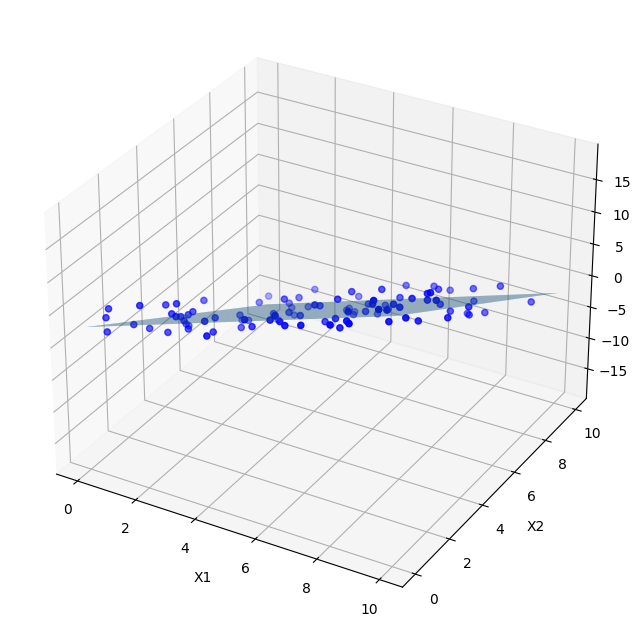

In [17]:
# 데이터와 예측 초평면 시각화
fig = plt.figure(figsize = (10,8))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c='b', marker='o')
ax.plot_surface(X1, X2, Z, alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

plt.show()

In [23]:
# 다중회귀 그래프 그리기_02

import numpy as np
import plotly.graph_objects as go

# 00. data
X = np.random.rand(100,2)*10
y = np.dot(X, [1.5,-2.]) + +0.5 +np.random.rand(100)

# 01. model
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X, y)

# 02.Data for the Graph _ 예측값 역할
x1 = np.linspace(0,10,100) # 0~10까지 100개
x2 = np.linspace(0,10,100)

X1, X2 = np.meshgrid(x1, x2) # # 1차원의 변수들을 2차원으로 동시에 변환
Z = model.predict(np.c_[X1.ravel(), X2.ravel()])

# 03. Visualization
data = go.Scatter3d(x = X[:, 0], y=X[:, 1], z= y, mode='markers', marker=dict(color='blue', size=4), name = 'Data Points')

# 04. Surface & Layout(예측 초평면 시각화 및 그래프 레이아웃)
surface = go.Surface(x=X1, y=X2, z=Z,opacity=0.5, colorscale='Viridis', name='Predicted Plane')
layout = go.Layout(scene=dict(xaxis=dict(title='X1'), yaxis=dict(title='X2'), zaxis=dict(title='y')), showlegend=True)

# 05. graph(생성 및 출력)
fig = go.Figure(data=[data,surface], layout=layout)
fig.show()

다중 선형 회귀는
- 여러 개의 입력값과 결과값 같의 관계 확인 가능
- 어떤 입력값이 겨로가값에 어떠한 영향을 미치는지 알 수 있음
- 여러 개의 입력값 사이 간에 "상관관계"가 높을 경우 결과에 대한 신뢰성을 잃을 가능성이 있음.

In [ ]:
# 다음 파일은 01_01.LinearRegression_ML_RealData.ipynb.ipynb